## Experience Analytics 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import plotly.graph_objects as go
import plotly.express as px          
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [2]:
os.chdir('..')

In [3]:
from database.database_connection import DatabaseConnection
from database.database import DatabaseProcessor
from src.utils import check_missing_values, filter_numerical_columns, check_duplicates, remove_outliers
from src.plot_utils import plot_count, plot_boxplot

In [4]:
database_connection = DatabaseConnection()
database_processor = DatabaseProcessor()

In [5]:
connection = database_connection.connect()

Successfully connected to the database.


In [6]:
query ='SELECT * FROM xdr_data'
df = database_connection.execute_query(query)

In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
missing_values = check_missing_values(df)
missing_values

,missing_values,missing_values_percentage,datatype
Bearer Id,991,0.660662,float64
Start,1,0.000667,object
Start ms,1,0.000667,float64
End,1,0.000667,object
End ms,1,0.000667,float64
Dur. (ms),1,0.000667,float64
IMSI,570,0.379997,float64
MSISDN/Number,1066,0.710662,float64
IMEI,572,0.381331,float64
Last Location Name,1153,0.768662,object


In [9]:
#replace missing values with the mean of the column
# fix missing values by filling with the mean

columns_with_numerical_values = filter_numerical_columns(df)
columns_to_exclude = ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
for column in columns_with_numerical_values :
    if column not in columns_to_exclude:
        columns_with_numerical_values[column] = columns_with_numerical_values[column].fillna(columns_with_numerical_values[column].mean())

#check for missing values
columns_with_numerical_values.isnull().sum()

Bearer Id                                    991
Start ms                                       0
End ms                                         0
Dur. (ms)                                      0
IMSI                                         570
MSISDN/Number                               1066
IMEI                                         572
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%)                            0
10 Kbps < UL TP < 50 Kbps (%)                  0
50 Kbps < UL TP < 300 Kbps (%)                 0
UL TP > 300 Kbps (%)

In [10]:
# check for duplicates
duplicates = check_duplicates(df)
duplicates 

'no duplicates found'

In [11]:
# relevant columns for Round Trip Time 

relevant_cloumns_rtt= ['Avg RTT DL (ms)','Avg RTT UL (ms)']
# relevant columns for  throughput

relevant_columns_throughput = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP DL (kbps)']

#relevant columns for Average TCP retransmission

relevant_colummns_tcp_retransmission = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)' ]


In [12]:
# for each user group by average tcp transmitted

columns_with_numerical_values['Total TCP Transmistted'] = columns_with_numerical_values['TCP DL Retrans. Vol (Bytes)'] + columns_with_numerical_values['TCP UL Retrans. Vol (Bytes)']

columns_with_numerical_values

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total TCP Transmistted
0,1.311448e+19,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,2.156957e+07
1,1.311448e+19,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,2.156957e+07
2,1.311448e+19,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.000000,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,2.156957e+07
3,1.311448e+19,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.000000,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,2.156957e+07
4,1.311448e+19,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.000000,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,2.156957e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,2.156957e+07
149997,7.349883e+18,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,2.156957e+07
149998,1.311448e+19,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,2.156957e+07
149999,1.311448e+19,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,2.156957e+07


In [13]:
average_tcp_per_user = columns_with_numerical_values.groupby('MSISDN/Number').agg({
    'Total TCP Transmistted': 'mean'
})
average_tcp_per_user = average_tcp_per_user.rename(columns={
    'Total TCP Transmistted':'Avarage TCP Transmitted'
}).reset_index()
average_tcp_per_user

,MSISDN/Number,Avarage TCP Transmitted
0,3.360100e+10,2.156957e+07
1,3.360100e+10,2.156957e+07
2,3.360100e+10,2.156957e+07
3,3.360101e+10,7.607247e+05
4,3.360101e+10,1.547020e+07
...,...,...
106851,3.379000e+10,2.180450e+05
106852,3.379000e+10,2.156957e+07
106853,3.197021e+12,2.156957e+07
106854,3.370000e+14,2.156957e+07


In [14]:
#Average RTT per user 
columns_with_numerical_values['Total Average RTT (ms)'] = columns_with_numerical_values['Avg RTT DL (ms)'] + columns_with_numerical_values['Avg RTT UL (ms)']
average_rtt_per_user = columns_with_numerical_values.groupby('MSISDN/Number')[['Total Average RTT (ms)']].sum()
average_rtt_per_user


,Total Average RTT (ms)
MSISDN/Number,
3.360100e+10,46.000000
3.360100e+10,31.000000
3.360100e+10,127.458589
3.360101e+10,84.000000
3.360101e+10,119.000000
...,...
3.379000e+10,52.000000
3.379000e+10,40.000000
3.197021e+12,127.458589


In [15]:
# average throughput
columns_with_numerical_values['Total Average TP'] = columns_with_numerical_values['Avg Bearer TP DL (kbps)'] + columns_with_numerical_values['Avg Bearer TP UL (kbps)']
average_total_tp = columns_with_numerical_values.groupby('MSISDN/Number')[['Total Average TP']].sum()
average_total_tp

,Total Average TP
MSISDN/Number,
3.360100e+10,76.0
3.360100e+10,99.0
3.360100e+10,97.0
3.360101e+10,248.0
3.360101e+10,56844.0
...,...
3.379000e+10,10365.0
3.379000e+10,116.0
3.197021e+12,1.0


In [16]:
# most frequent handset type 

most_frequent_handset_type_per_person = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else None).reset_index()
most_frequent_handset_type_per_person

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)
...,...,...
106851,3.379000e+10,Huawei Honor 9 Lite
106852,3.379000e+10,Apple iPhone 8 Plus (A1897)
106853,3.197021e+12,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,Huawei B525S-23A


In [17]:
# store to new data frame called consolidated

consolidated = pd.merge(most_frequent_handset_type_per_person,average_rtt_per_user, on ='MSISDN/Number')
consolidated = pd.merge(consolidated , average_total_tp , on='MSISDN/Number')
consolidated = pd.merge(consolidated, average_tcp_per_user, on='MSISDN/Number')
print(consolidated.dtypes)
consolidated.head()


MSISDN/Number              float64
Handset Type                object
Total Average RTT (ms)     float64
Total Average TP           float64
Avarage TCP Transmitted    float64
dtype: object


,MSISDN/Number,Handset Type,Total Average RTT (ms),Total Average TP,Avarage TCP Transmitted
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.000000,76.0,2.156957e+07
1,3.360100e+10,Apple iPhone 7 (A1778),31.000000,99.0,2.156957e+07
2,3.360100e+10,undefined,127.458589,97.0,2.156957e+07
3,3.360101e+10,Apple iPhone 5S (A1457),84.000000,248.0,7.607247e+05
4,3.360101e+10,Apple iPhone Se (A1723),119.000000,56844.0,1.547020e+07


In [29]:
#top ten per each metric
top_ten_tcp = consolidated['Avarage TCP Transmitted'].nlargest(10)
top_ten_rtt = consolidated['Total Average RTT (ms)'].nlargest(10)
top_ten_tp = consolidated['Total Average TP'].nlargest(10)

print('top then TCP ')
print(top_ten_tcp)


print('top ten rtt')
print(top_ten_rtt)

print('top ten tp')
print(top_ten_tp)


top then TCP 
85785    4.301477e+09
32273    4.288121e+09
58026    4.268647e+09
31942    4.254660e+09
62049    4.211258e+09
70079    4.166595e+09
43629    4.137938e+09
48341    4.117805e+09
64113    3.968121e+09
98211    3.786871e+09
Name: Avarage TCP Transmitted, dtype: float64
top ten rtt
47983     96924.0
41944     64670.0
80249     54848.0
85683     46021.0
96414     37084.0
70142     36304.0
93844     27278.0
1713      26300.0
74240     25715.0
104325    25388.0
Name: Total Average RTT (ms), dtype: float64
top ten tp
97584    902222.0
69910    840424.0
36257    798342.0
73146    690815.0
69020    676858.0
84486    618797.0
13141    564179.0
29313    550352.0
98213    549661.0
60763    530353.0
Name: Total Average TP, dtype: float64


In [19]:
# How many users share handset type 

most_shared_handset_within_users = df.groupby('Handset Type')['MSISDN/Number'].count().reset_index()
most_shared_handset_within_users



,Handset Type,MSISDN/Number
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2
1392,Zyxel Communicat. Lte7460,1
1393,Zyxel Communicat. Sbg3600,1
1394,Zyxel Communicat. Zyxel Wah7706,1


In [20]:
# fill missing values with mean 
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean()).infer_objects(copy=False)
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean()).infer_objects(copy=False)


# Avarage total TP
df['Total Ave TP'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

# average TP per handset type
average_tp_per_handsettype = df.groupby('Handset Type').agg({
    'Total Ave TP': 'mean'
}).reset_index()
# average_tp_per_handsettype = average_tp_per_handsettype.rename(columns={
#   'Total Ave Tp':   'Mean tp'
# })
average_tp_per_handsettype.head()
 

,Handset Type,Total Ave TP
0,A-Link Telecom I. Cubot A5,23510.0
1,A-Link Telecom I. Cubot Note Plus,6699.0
2,A-Link Telecom I. Cubot Note S,8937.0
3,A-Link Telecom I. Cubot Nova,56217.0
4,A-Link Telecom I. Cubot Power,69468.0


In [21]:
# standard deviation

std_dev= average_tp_per_handsettype.std()
std_dev

TypeError: could not convert string to float: 'A-Link Telecom I. Cubot A5'

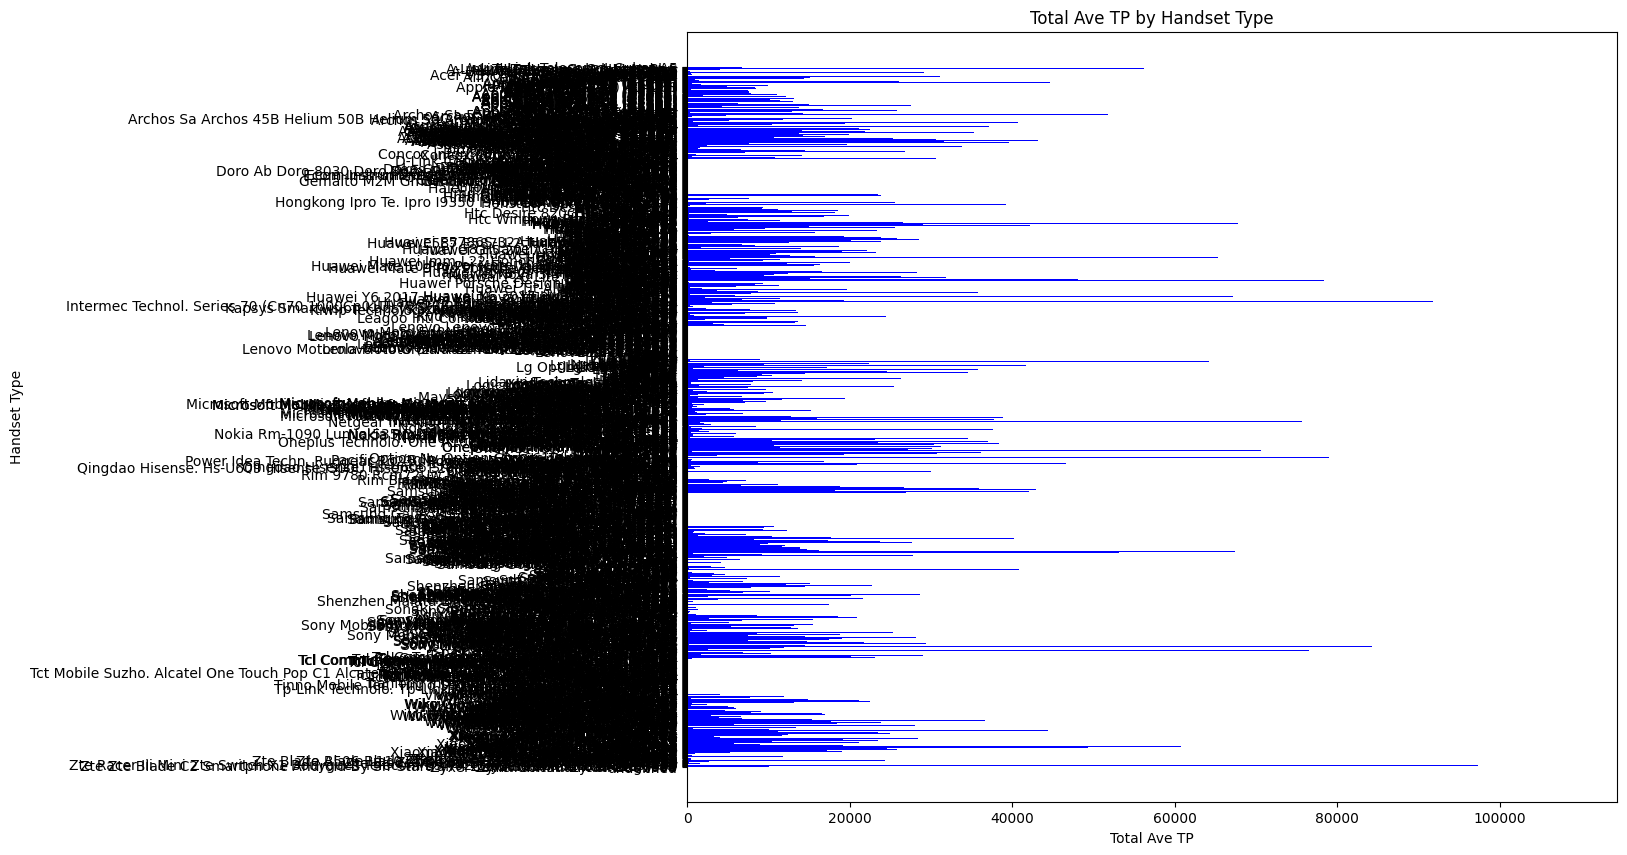

In [22]:
# Plot bar graph

plt.figure(figsize=(12, 10))
plt.barh(average_tp_per_handsettype['Handset Type'], average_tp_per_handsettype['Total Ave TP'], color='blue')
plt.xlabel("Total Ave TP")
plt.ylabel("Handset Type")
plt.title("Total Ave TP by Handset Type")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()

In [23]:
#Average TCP Retransmission per handset
mean_tcp_per_handsettype= consolidated.groupby('Handset Type')['Avarage TCP Transmitted'].agg({
 'mean', 
}).reset_index()

mean_tcp_per_handsettype

,Handset Type,mean
0,A-Link Telecom I. Cubot A5,2.156957e+07
1,A-Link Telecom I. Cubot Note Plus,6.162130e+05
2,A-Link Telecom I. Cubot Note S,4.141173e+07
3,A-Link Telecom I. Cubot Nova,1.371700e+05
4,A-Link Telecom I. Cubot Power,8.041000e+03
...,...,...
1389,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,1.116595e+07
1390,Zyxel Communicat. Lte7460,4.127655e+07
1391,Zyxel Communicat. Sbg3600,5.348694e+07
1392,Zyxel Communicat. Zyxel Wah7706,7.597747e+05


In [24]:
consolidated.describe()

,MSISDN/Number,Total Average RTT (ms),Total Average TP,Avarage TCP Transmitted
count,1.068560e+05,106856.000000,106856.00000,1.068560e+05
mean,4.511474e+10,175.838415,20986.26210,2.084754e+07
std,2.889423e+12,670.095424,42436.28775,9.872930e+07
min,3.360100e+10,0.000000,0.00000,9.700000e+01
25%,3.365088e+10,47.000000,97.00000,5.327824e+06
50%,3.366365e+10,94.000000,301.00000,2.156957e+07
75%,3.368344e+10,140.000000,26507.25000,2.156957e+07
max,8.823971e+14,96924.000000,902222.00000,4.301477e+09


In [25]:
#metrics for clustering
metrics_for_clustering = ['Total Average RTT (ms)', 'Total Average TP' , 'Avarage TCP Transmitted']

#drop rows with missing values in the columns used for clustering 

consolidated.dropna(subset=metrics_for_clustering, inplace= True)

# Standardize features

scaler = StandardScaler()
consolidated_data_scaled = scaler.fit_transform(consolidated[metrics_for_clustering])

#choose the number of clusters
n_cluster =3
kmeans = KMeans(n_clusters=n_cluster , random_state=42)
consolidated['cluster']= kmeans.fit_predict(consolidated_data_scaled)

#calculate Eculidean distance to the centroids
consolidated['eculidean distance'] = consolidated.apply(
     lambda row: distance.euclidean(row[metrics_for_clustering], kmeans.cluster_centers_[row['cluster']]),
    axis=1
)

#assign experiance scores
consolidated['experience score'] = 1 / (1 + consolidated['eculidean distance'])
consolidated.head(15)


,MSISDN/Number,Handset Type,Total Average RTT (ms),Total Average TP,Avarage TCP Transmitted,cluster,eculidean distance,experience score
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.000000,76.0,2.156957e+07,1,2.156957e+07,4.636160e-08
1,3.360100e+10,Apple iPhone 7 (A1778),31.000000,99.0,2.156957e+07,1,2.156957e+07,4.636160e-08
2,3.360100e+10,undefined,127.458589,97.0,2.156957e+07,1,2.156957e+07,4.636160e-08
3,3.360101e+10,Apple iPhone 5S (A1457),84.000000,248.0,7.607247e+05,1,7.607248e+05,1.314534e-06
4,3.360101e+10,Apple iPhone Se (A1723),119.000000,56844.0,1.547020e+07,1,1.547031e+07,6.463995e-08
5,3.360101e+10,Samsung Galaxy A8 (2018),151.458589,7908.0,1.116600e+07,1,1.116600e+07,8.955759e-08
6,3.360101e+10,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,53.000000,42513.0,1.083990e+07,1,1.083999e+07,9.225103e-08
7,3.360101e+10,Samsung Galaxy S8 Plus (Sm-G955F),52.000000,1247.0,7.599367e+05,1,7.599377e+05,1.315896e-06
8,3.360101e+10,undefined,254.917178,189.0,2.156957e+07,1,2.156957e+07,4.636160e-08
9,3.360102e+10,Apple iPhone X (A1865),62.000000,146.0,2.081121e+07,1,2.081121e+07,4.805103e-08


In [26]:
# displau the consolidated data with experience score of each user 
print(consolidated[['MSISDN/Number', 'experience score']])

        MSISDN/Number  experience score
0        3.360100e+10      4.636160e-08
1        3.360100e+10      4.636160e-08
2        3.360100e+10      4.636160e-08
3        3.360101e+10      1.314534e-06
4        3.360101e+10      6.463995e-08
...               ...               ...
106851   3.379000e+10      4.581014e-06
106852   3.379000e+10      4.636160e-08
106853   3.197021e+12      4.636160e-08
106854   3.370000e+14      4.636160e-08
106855   8.823971e+14      4.636160e-08

[106856 rows x 2 columns]


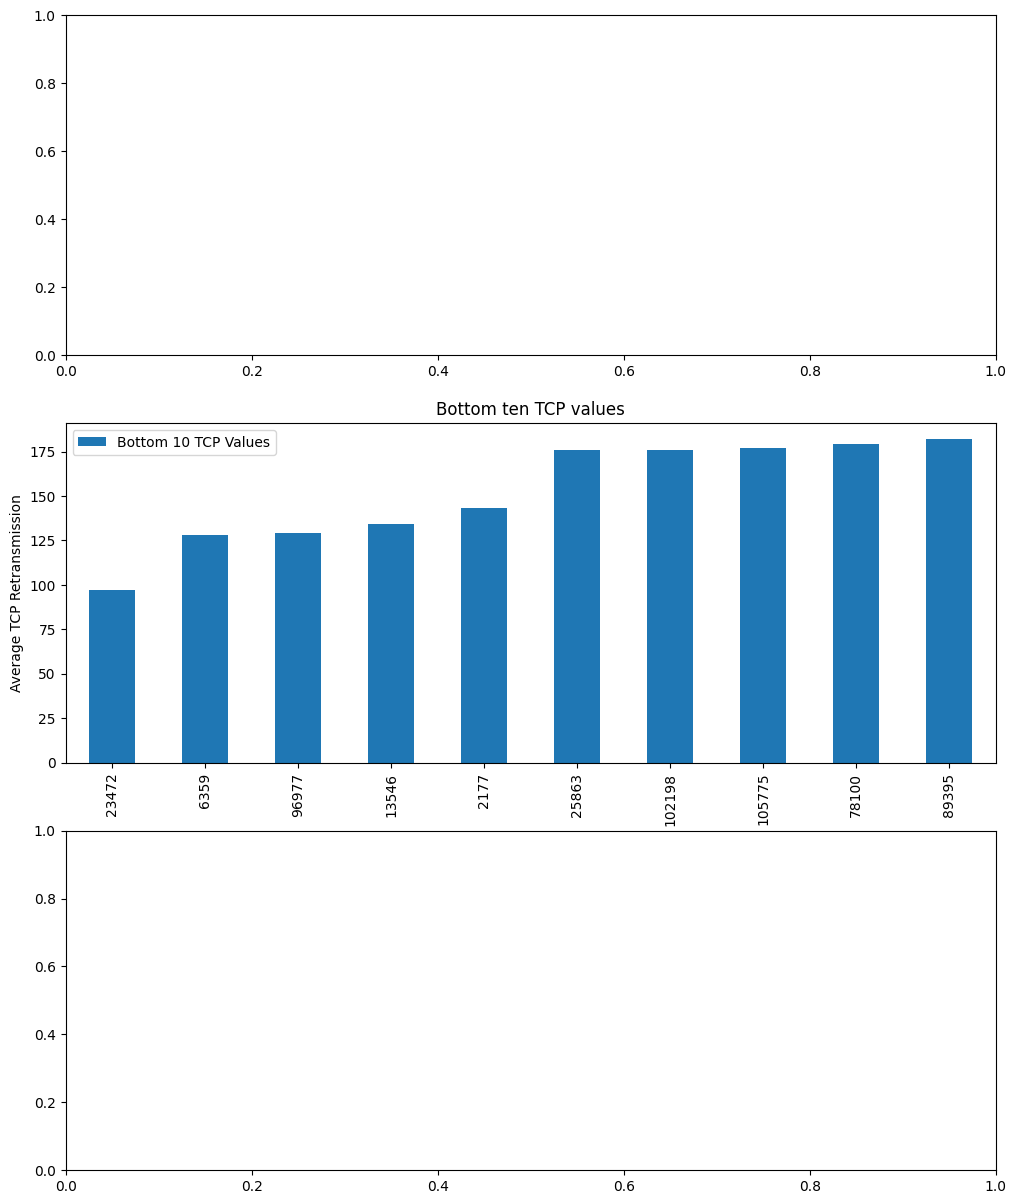

In [30]:
# Top 10 TCP values
top_ten_tcp = consolidated['Avarage TCP Transmitted'].nlargest(10)
#bottom ten TCP values
bottom_ten_tcp = consolidated['Avarage TCP Transmitted'].nsmallest(10)
#most frequent TCP
most_frequent_tcp = consolidated['Avarage TCP Transmitted'].value_counts().head(10)


#plot the graph for each value above

top_ten_data = pd.DataFrame({'Top 10 TCP Values': top_ten_tcp}, index=top_ten_tcp.index)
bottom_ten_data = pd.DataFrame({'Bottom 10 TCP Values':bottom_ten_tcp}, index=bottom_ten_tcp.index)
most_frequent_data = pd.DataFrame({'Most Frequent Values': most_frequent_tcp}, index=most_frequent_tcp.index)

fig,axes =plt.subplots(3,1,figsize=(12,15))

bottom_ten_data.plot(kind='bar', ax=axes[1], legend=True)
axes[1].set_ylabel('Average TCP Retransmission')
axes[1].set_title('Bottom ten TCP values')

plt.show()


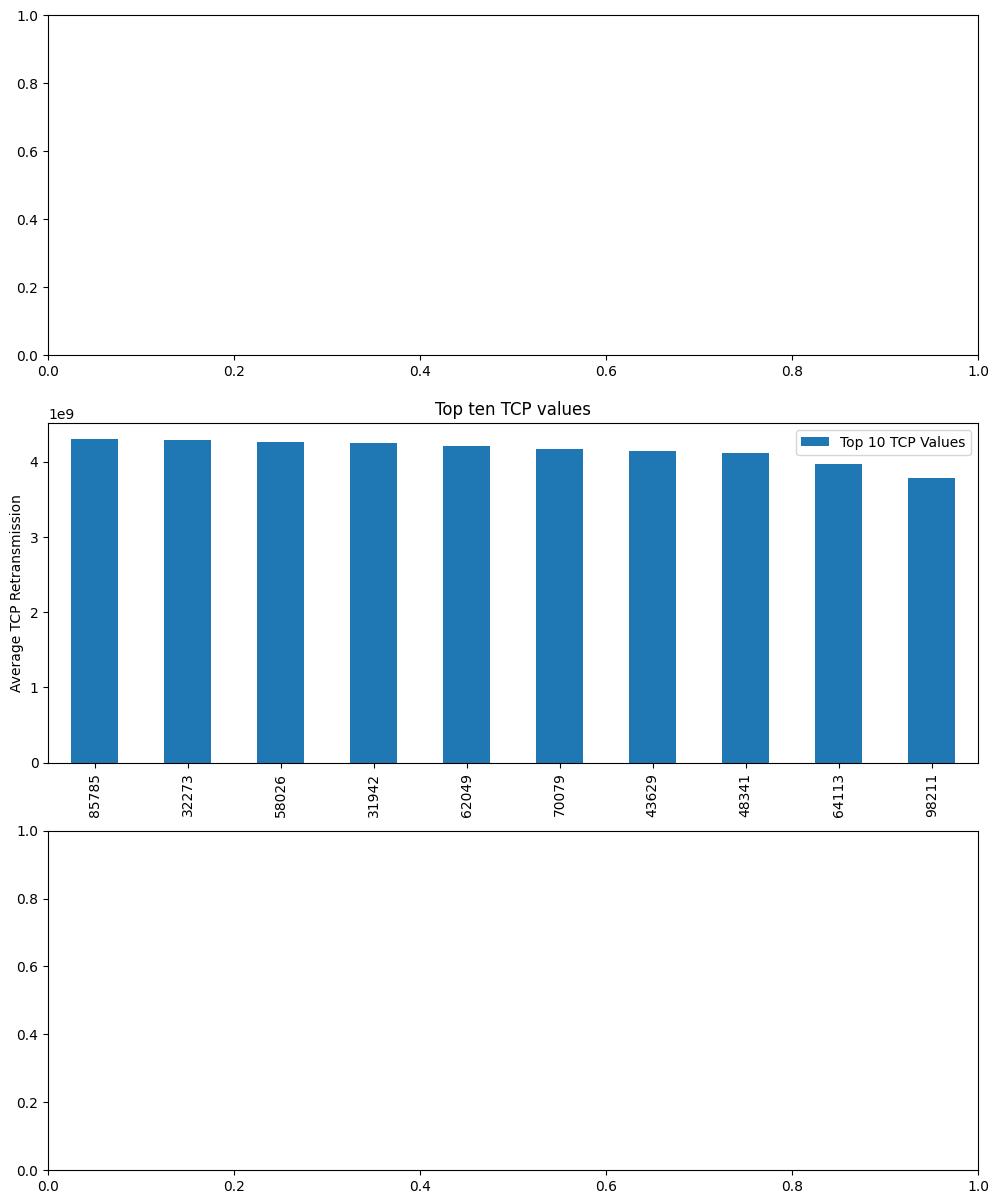

In [32]:
#plot top ten tcp values
fig,axes =plt.subplots(3,1,figsize=(12,15))
top_ten_data.plot(kind='bar', ax=axes[1], legend=True)
axes[1].set_ylabel('Average TCP Retransmission')
axes[1].set_title('Top ten TCP values')

plt.show()

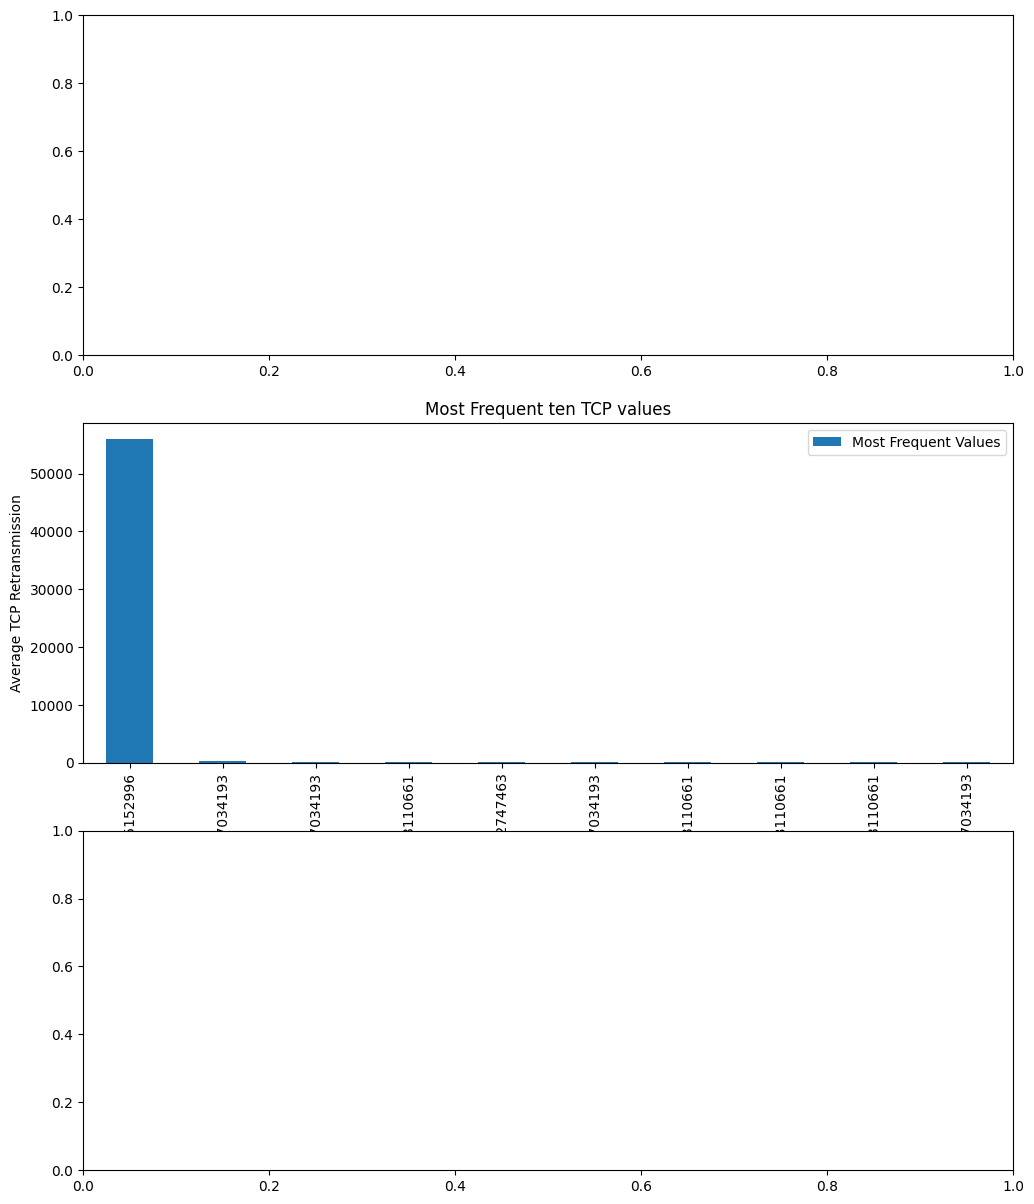

In [33]:
#plot most frequent  tcp values 

fig,axes =plt.subplots(3,1,figsize=(12,15))
most_frequent_data.plot(kind='bar', ax=axes[1], legend=True)
axes[1].set_ylabel('Average TCP Retransmission')
axes[1].set_title('Most Frequent ten TCP values')
plt.show()
